In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
DATA_DIRECTORY = 'Z:/fml-final/data/0-perfect-all-events/'

In [40]:
EVENTS = ["MOVED_LEFT", "MOVED_RIGHT", "MOVED_UP", "MOVED_DOWN", "WAITED", "INVALID_ACTION", "BOMB_DROPPED", "BOMB_EXPLODED", "CRATE_DESTROYED", "COIN_FOUND", "COIN_COLLECTED", "KILLED_OPPONENT", "KILLED_SELF", "GOT_KILLED", "OPPONENT_ELIMINATED", "SURVIVED_ROUND"]
ACTUAL_REWARDS = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, 0]
REWARDS = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, 0]
ACTIONS = ["UP", "RIGHT", "DOWN", "LEFT", "WAIT", "BOMB"]

In [4]:
# s, a, s_, e, step

In [5]:
trajectory_lengths_raw = []
event_counter_raw = [0] * len(EVENTS)
action_counter_raw = [0] * len(ACTIONS)

trajectory_lengths = []
event_counter = [0] * len(EVENTS)
action_counter = [0] * len(ACTIONS)

trajectories_only_actions_events = []

In [6]:
for filename in tqdm(os.listdir(DATA_DIRECTORY)):
    with open(DATA_DIRECTORY + filename, "rb") as file:
        trajectories = pickle.load(file)

        for trajectory in trajectories:
            trajectory_lengths_raw.append(len(trajectory))
            for step, transition in enumerate(trajectory):
                for event in transition[3]:
                    event_counter_raw[event] += 1
                action_counter_raw[transition[1]] += 1
            
            if len(trajectory) < 380:
                trajectory_lengths.append(len(trajectory))
                trajectory_only_actions_events = []
                for step, transition in enumerate(trajectory):
                    for event in transition[3]:
                        event_counter[event] += 1
                    action_counter[transition[1]] += 1
                    trajectory_only_actions_events.append([transition[1], transition[3]])
                trajectories_only_actions_events.append(trajectory_only_actions_events)

100%|██████████| 16/16 [01:55<00:00,  7.20s/it]


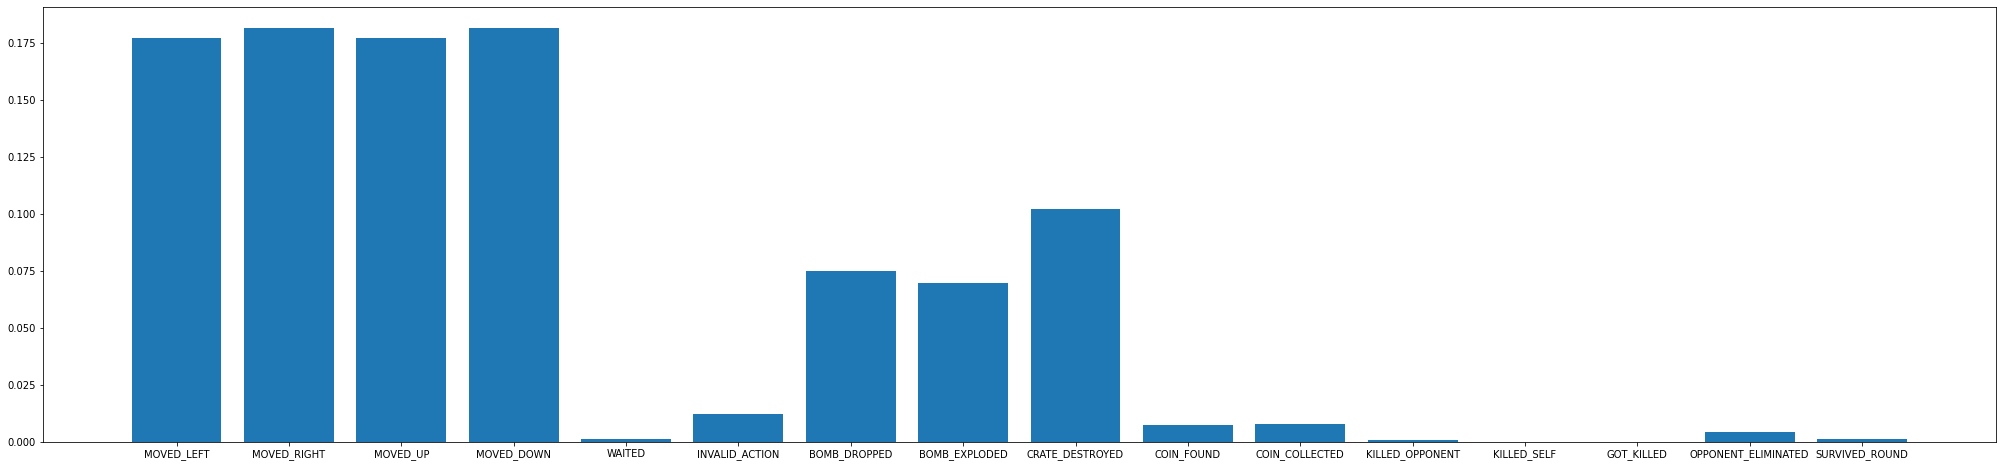

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(35, 8))
ax.bar(EVENTS, event_counter_raw / np.sum(event_counter_raw));

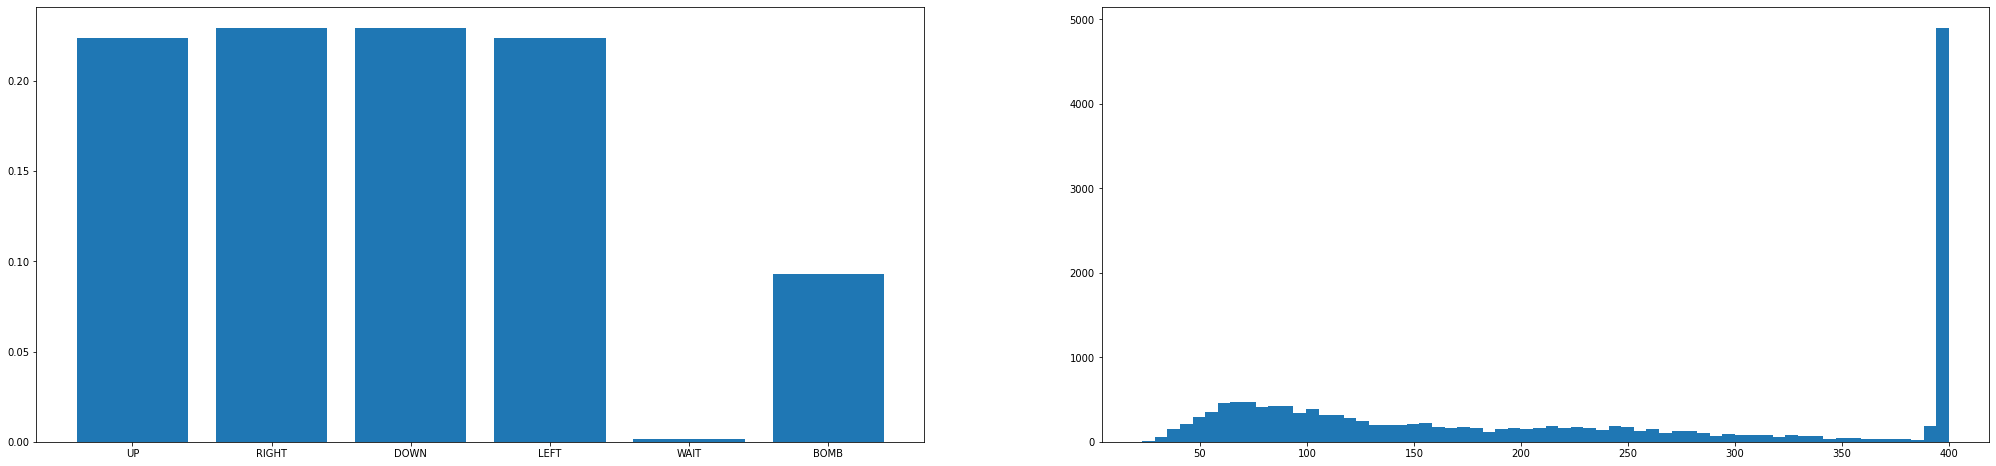

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(35, 8))
ax[0].bar(ACTIONS, action_counter_raw / np.sum(action_counter_raw))
ax[1].hist(trajectory_lengths_raw, bins=64);

In [9]:
print(f"Filtering out {np.round(np.sum(np.array(trajectory_lengths_raw) >= 380) / np.sum(np.array(trajectory_lengths_raw)), 2) * 100} events with 380 cutoff")

Filtering out 0.0 events with 380 cutoff


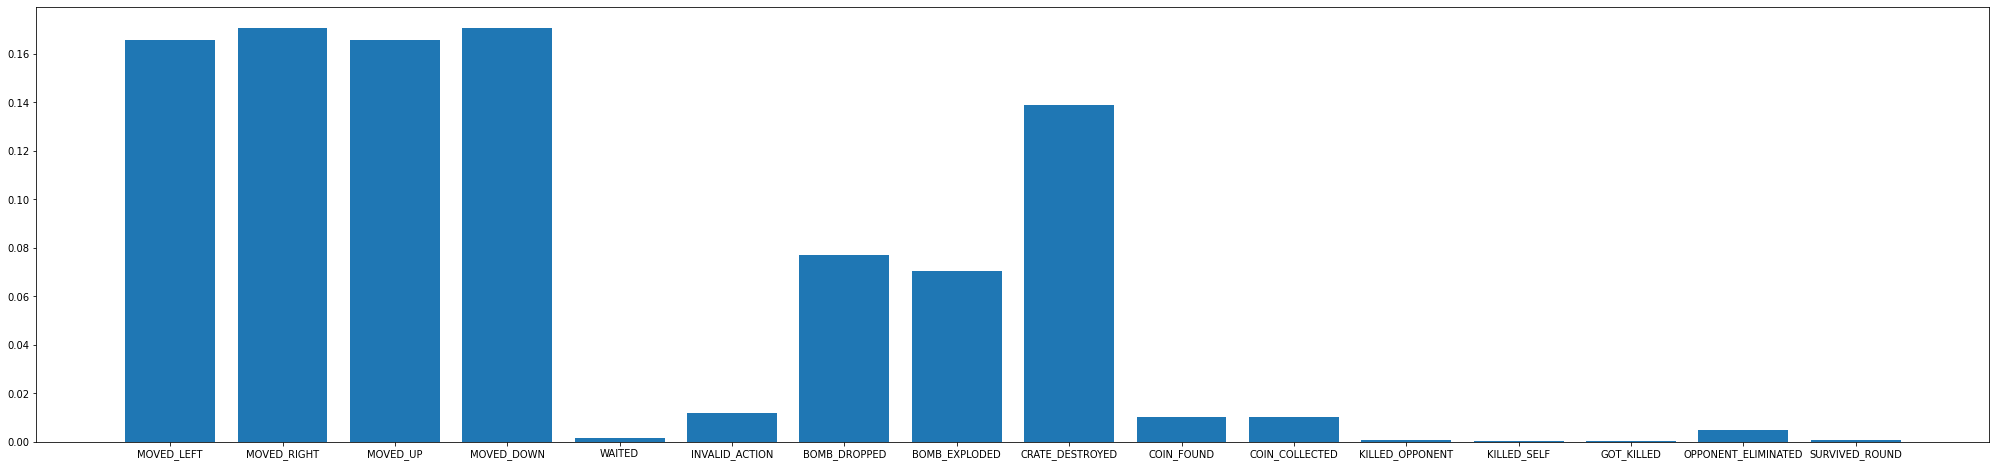

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(35, 8))
ax.bar(EVENTS, event_counter / np.sum(event_counter));

In [41]:
REWARDS[8] = (event_counter[9] / event_counter[8]) * (event_counter[10] / event_counter[9])
REWARDS[6] = REWARDS[8] * (event_counter[8] / event_counter[6]) + (event_counter[11] / event_counter[6])

print(f"{np.round(event_counter[9] / event_counter[8] * 100, 2)}% of destroyed crates had a coin in it.")
print(f"Every bomb destroyed on average {np.round(event_counter[8] / event_counter[6], 2)} of crates.")
print(f"Every bomb killed on average {np.round(event_counter[11] / event_counter[6], 2)} opponents.")
print(f"{np.round(event_counter[10] / event_counter[9] * 100, 2)}% of found coins were also collected.")
print(f"There are {np.round(np.sum(event_counter[:4]) / event_counter[10], 2)} movement events for every collected coin")

7.3% of destroyed crates had a coin in it.
Every bomb destroyed on average 1.8 of crates.
Every bomb killed on average 0.01 opponents.
103.28% of found coins were also collected.
There are 64.32 movement events for every collected coin


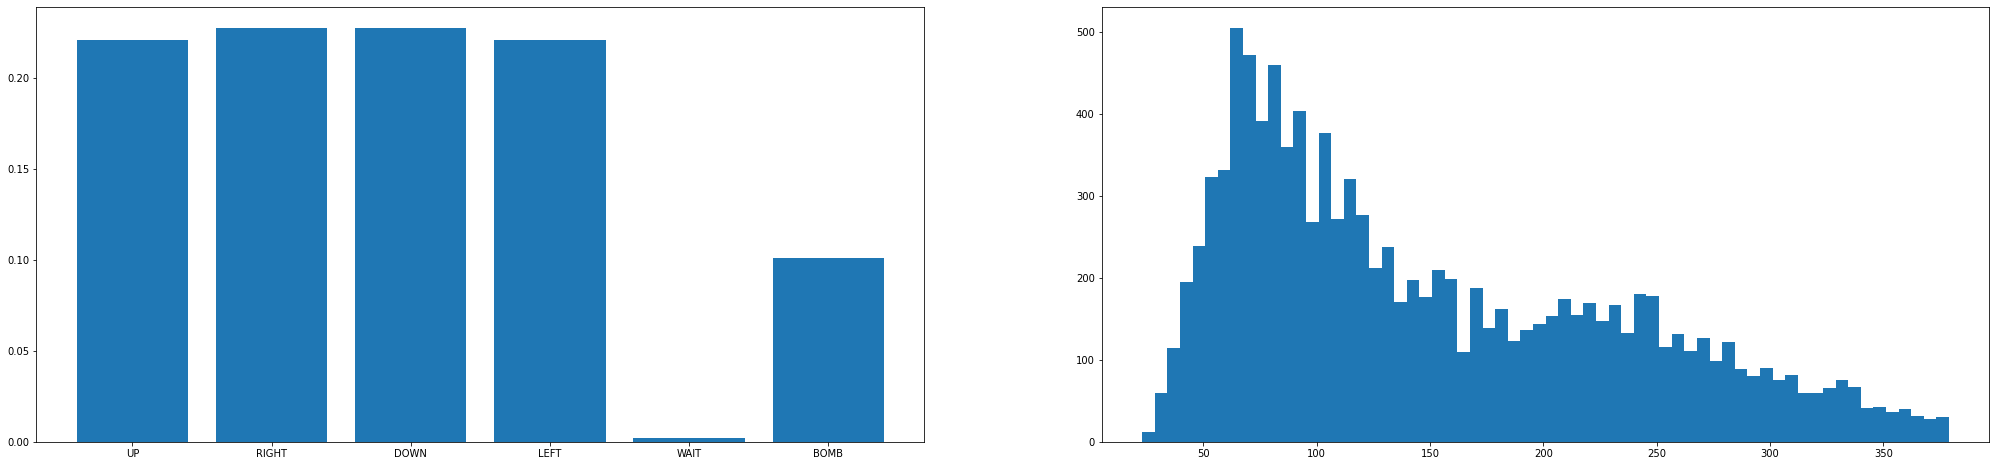

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(35, 8))
ax[0].bar(ACTIONS, action_counter / np.sum(action_counter))
ax[1].hist(trajectory_lengths, bins=64);

In [53]:
total_actual_reward = 0
actual_rewards = []
score_at_step = np.zeros(401)
times_visited_step = np.zeros_like(actual_reward_at_step)
total_n_transitions = 0
total_n_trajectories = 0
for trajectory in trajectories_only_actions_events:
    total_n_trajectories += 1
    accumulated_score = 0
    for step, (_, events) in enumerate(trajectory):
        total_n_transitions += 1
        actual_reward = 0
        for ev in events:
            actual_reward += ACTUAL_REWARDS[ev]
            total_actual_reward += ACTUAL_REWARDS[ev]
        actual_rewards.append(actual_reward)
        accumulated_score += actual_reward

        score_at_step[step] += accumulated_score
        times_visited_step[step] += 1

The average reward per game is 2.66.
The optimal score is 4?


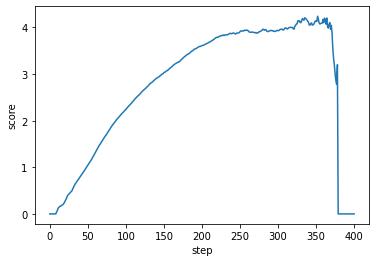

In [63]:
REWARDS[13] = -total_actual_reward / total_n_trajectories - 5

print(f"The average reward per game is {np.round(total_actual_reward / total_n_trajectories, 2)}.")
print(f"The optimal score is 4?")
times_visited_step[times_visited_step == 0] = 1
plt.plot(np.arange(401), score_at_step / times_visited_step); plt.xlabel("step"); plt.ylabel("score");

In [44]:
REWARDS[4] = -total_actual_reward / total_n_transitions
REWARDS[5] = REWARDS[4]

print(f"One transition is worth {np.round(total_actual_reward / total_n_transitions, 3)} points. Waiting results in equally many points being missed.")

One transition is worth 0.018 points. Waiting results in equally many points being missed.


In [64]:
for e, r in zip(EVENTS, REWARDS):
    print(f"{e}: {np.round(r, 5)}")

MOVED_LEFT: 0
MOVED_RIGHT: 0
MOVED_UP: 0
MOVED_DOWN: 0
WAITED: -0.01763
INVALID_ACTION: 0
BOMB_DROPPED: 0.14352
BOMB_EXPLODED: 0
CRATE_DESTROYED: 0.0754
COIN_FOUND: 0
COIN_COLLECTED: 1
KILLED_OPPONENT: 5
KILLED_SELF: 0
GOT_KILLED: -7.6574
OPPONENT_ELIMINATED: 0
SURVIVED_ROUND: 0
